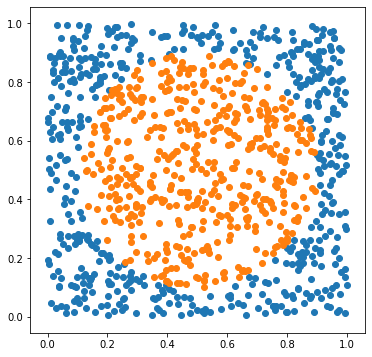

In [1]:
import torch
import math
import matplotlib.pyplot as plt

import Modules as M
import Sequential as S
import Optimizer as O

from helpers import *

torch.set_grad_enabled(False)

data, target, data_test, target_test = generate_disc_set(1000, show_data=True)
data, data_test = normalize_data(data, data_test)

In [2]:
m1 = M.Linear(2,25)
m2 = M.Linear(25,25)
m3 = M.Linear(25,25)
m4 = M.Linear(25,2)
relu = M.ReLu()

model = S.Sequential(m1,relu,m2,relu,m3,relu,m4)

In [3]:
criterion = M.MSE()
#criterion = MS.CrossEntropyLoss()
optimizer = O.SGD(model.param(),eta=1e-1)

mini_batch_size = 100
nb_epochs = 250

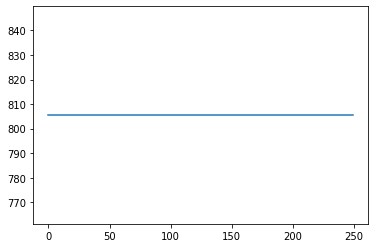

In [4]:
losses = train_model(model, criterion, optimizer, data, target, nb_epochs, mini_batch_size)
plt.plot(losses)
plt.show()

In [5]:
print('TRAIN ERROR = {:.2f}%'.format(compute_nb_errors(model, data, target, mini_batch_size) / data.size(0) * 100))
print('TEST ERROR = {:.2f}%'.format(compute_nb_errors(model, data_test, target_test, mini_batch_size) / data_test.size(0) * 100))

TRAIN ERROR = 46.50%
TEST ERROR = 44.90%
